<h1>All Respondents Analysis with Grades</h1>

<h2>Read All Respondents Data</h2>

In [1]:
import os
import pandas as pd

# Specify the folder path where the CSV files are located
folder_path = "../all respondents data"

# Initialize an empty dataframe to store the combined data
combined_data = pd.DataFrame()

# Loop through each file in the folder with .csv extension and append to the combined_data dataframe
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path, low_memory=False)
        respondent_num = filename.split('_')[0]  # Get the first part of the filename before the first '_'
        df['Respondent'] = respondent_num  # Add a new column with the respondent number
        combined_data = pd.concat([combined_data, df])

columns_to_remove = ['Row','Timestamp','EventSource','SlideEvent','StimType','Duration',
                     'CollectionPhase','SourceStimuliName','EventSource','SampleNumber','EventSource.1',
                     'Blink', 'BlinkRate', 'EventSource.2']
combined_data.drop(columns_to_remove, axis=1, inplace=True)

# Print the combined data
print(combined_data)


           Anger  Contempt   Disgust      Fear       Joy   Sadness  Surprise  \
0            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       0.125566  0.186393  0.023706  0.125796  0.025453  0.125512  0.055428   
3       0.125833  0.186909  0.023738  0.126169  0.025312  0.125694  0.055510   
4            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...          ...       ...       ...       ...       ...       ...       ...   
148355       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
148356  0.245047  0.204197  0.028027  0.133038  0.041089  0.118906  0.057576   
148357       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
148358       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
148359       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

        Engagement  Valence  Sentimenta

In [2]:
print(combined_data)

           Anger  Contempt   Disgust      Fear       Joy   Sadness  Surprise  \
0            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       0.125566  0.186393  0.023706  0.125796  0.025453  0.125512  0.055428   
3       0.125833  0.186909  0.023738  0.126169  0.025312  0.125694  0.055510   
4            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...          ...       ...       ...       ...       ...       ...       ...   
148355       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
148356  0.245047  0.204197  0.028027  0.133038  0.041089  0.118906  0.057576   
148357       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
148358       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
148359       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

        Engagement  Valence  Sentimenta

In [3]:
import pandas as pd

# Read in the Grades.csv file
grades_df = pd.read_csv('Grades.csv')

# Remove the trailing underscore from the "Respondent" column in the grades_df dataframe
grades_df['Respondent'] = grades_df['Respondent'].str.rstrip('_')

# Merge the combined_data and grades_df dataframes based on the "Respondent" column
combined_data_with_grades = pd.merge(combined_data, grades_df[['Respondent', 'Grade']], on='Respondent')

# Print the resulting dataframe with the added "Grade" column
print(combined_data_with_grades)


            Anger  Contempt   Disgust      Fear       Joy   Sadness  Surprise  \
0             NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1             NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2        0.125566  0.186393  0.023706  0.125796  0.025453  0.125512  0.055428   
3        0.125833  0.186909  0.023738  0.126169  0.025312  0.125694  0.055510   
4             NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...           ...       ...       ...       ...       ...       ...       ...   
1379286       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1379287  0.245047  0.204197  0.028027  0.133038  0.041089  0.118906  0.057576   
1379288       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1379289       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1379290       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

         Engagement  Valenc

In [4]:
print(combined_data_with_grades.columns)

Index(['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Engagement', 'Valence', 'Sentimentality', 'Confusion', 'Neutral',
       'Attention', 'Brow Furrow', 'Brow Raise', 'Cheek Raise', 'Chin Raise',
       'Dimpler', 'Eye Closure', 'Eye Widen', 'Inner Brow Raise', 'Jaw Drop',
       'Lip Corner Depressor', 'Lip Press', 'Lip Pucker', 'Lip Stretch',
       'Lip Suck', 'Lid Tighten', 'Mouth Open', 'Nose Wrinkle', 'Smile',
       'Smirk', 'Upper Lip Raise', 'Pitch', 'Yaw', 'Roll',
       'Interocular Distance', 'Gaze X', 'Gaze Y', 'Interpolated Gaze X',
       'Interpolated Gaze Y', 'Interpolated Distance', 'Gaze Velocity',
       'Gaze Acceleration', 'Fixation Index', 'Fixation Index by Stimulus',
       'Fixation X', 'Fixation Y', 'Fixation Start', 'Fixation End',
       'Fixation Duration', 'Fixation Dispersion', 'Saccade Index',
       'Saccade Index by Stimulus', 'Saccade Start', 'Saccade End',
       'Saccade Duration', 'Saccade Amplitude', 'Saccade Peak

<h2>Facial Expressions Analysis</h2>

<h3>Data Pre-processing</h3>

In [5]:
import pandas as pd

facial_expressions_columns = ['Respondent', 'Grade','Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Engagement', 'Valence', 'Sentimentality', 'Confusion', 'Neutral',
       'Attention', 'Brow Furrow', 'Brow Raise', 'Cheek Raise', 'Chin Raise',
       'Dimpler', 'Eye Closure', 'Eye Widen', 'Inner Brow Raise', 'Jaw Drop',
       'Lip Corner Depressor', 'Lip Press', 'Lip Pucker', 'Lip Stretch',
       'Lip Suck', 'Lid Tighten', 'Mouth Open', 'Nose Wrinkle', 'Smile',
       'Smirk', 'Upper Lip Raise', 'Pitch', 'Yaw',
       'Roll']
# Creating a copy df with only the facial expressions data
facial_expressions_data = combined_data_with_grades[facial_expressions_columns].copy()

# Remove rows with all NaN values, except in the 'Respondent' column
facial_expressions_data = facial_expressions_data.dropna(how='all', 
                                                         subset=facial_expressions_data.columns.difference(['Respondent', 'Grade']))

facial_expressions_data.tail()



,Respondent,Grade,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,...,Lip Suck,Lid Tighten,Mouth Open,Nose Wrinkle,Smile,Smirk,Upper Lip Raise,Pitch,Yaw,Roll
1379279,019,55,0.139795,0.183797,0.026397,0.130016,0.045364,0.117328,0.060181,0.328766,...,0.125971,2.270765,6.647667,0.457276,4.720551,2.773993,0.106491,1.251196,-1.319161,-0.530024
1379281,019,55,0.153553,0.176831,0.026905,0.128566,0.046042,0.116635,0.058846,0.328766,...,0.129171,4.729377,6.861856,0.512176,4.703412,2.382556,0.255912,0.392811,-1.608518,-0.468374
1379283,019,55,0.168653,0.193708,0.027669,0.130344,0.045429,0.117382,0.058326,0.328766,...,0.135208,6.785742,7.472722,0.519497,4.585781,3.149543,0.253990,0.286135,-1.387060,-0.229705
1379285,019,55,0.195341,0.187637,0.027562,0.130503,0.043328,0.117269,0.057809,0.328766,...,0.135131,10.632483,7.365998,0.463937,4.418400,2.717841,0.150040,-1.702013,-1.998969,-0.185392
1379287,019,55,0.245047,0.204197,0.028027,0.133038,0.041089,0.118906,0.057576,0.328766,...,0.144891,16.228485,7.659717,0.376117,4.076993,3.261096,0.070152,-0.172043,-1.711222,-0.415041


<h2>Compare Facial Expressions by Grade Group</h2>

In [6]:

from tabulate import tabulate

# Add a new column to the combined_data_with_grades dataframe that indicates whether the grade is above or below 55
facial_expressions_data['Grade Group'] = facial_expressions_data['Grade'].apply(lambda x: 'Above 55' if x > 55 else 'Below 55')

# Describe statistics for each selected column by grade group
selected_columns = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Engagement', 'Valence', 'Sentimentality', 'Confusion']


<h2>Table for Each Emotion Describe</h2>

In [7]:
from scipy.stats import ttest_ind
from selenium import webdriver

# create a new Firefox browser window
driver = webdriver.Firefox()

# Define a function to add a star to indicate statistical significance
def add_star(pval):
    if pval < 0.05:
        return '*'
    else:
        return ''

# Loop through the emotions and perform a t-test between the grade groups
for col in selected_columns:
    # Create a DataFrame for the current emotion only
    emotion_data = facial_expressions_data.loc[:, ['Grade Group', col]]

    above_55 = emotion_data.loc[emotion_data['Grade Group'] == 'Above 55', col]
    below_55 = emotion_data.loc[emotion_data['Grade Group'] == 'Below 55', col]
    t, pval = ttest_ind(above_55, below_55, equal_var=True)
    pval_star = add_star(pval)

    # Calculate the statistics for the current emotion
    emotion_stats = emotion_data.groupby('Grade Group')[col].describe()
    emotion_stats['mean_diff'] = emotion_stats['mean'].diff().fillna(0)
    emotion_stats['median_diff'] = emotion_stats['50%'].diff().fillna(0)
    emotion_stats.loc['', 'p-value'] = pval

    # Create a formatted table for the current emotion
    emotion_stats_formatted = emotion_stats.style\
        .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])\
        .set_caption(col)\
        .format('{:.2f}')\
        .set_properties(**{'width': '50px', 'text-align': 'center'})\
        .set_table_attributes('style="border-collapse: separate; border-spacing: 20px;"')\
        .applymap(lambda x: 'background-color: #f2f2f2' if x == emotion_stats['mean'].max() else '')

    # Display the table for the current emotion
    display(emotion_stats_formatted)

    # Save the table as an HTML file and take a screenshot
    filename = col + '_grades_stats.html'
    emotion_stats_formatted.to_html(filename)
    driver.get('C:\\projects\\classifiers\\grade groups model\\results images\\' + filename)
    driver.save_screenshot(filename + "_screenshot.png")

# close the browser window
driver.quit()


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,397414.00,1.08,3.69,0.00,0.14,0.26,1.06,97.43,0.00,0.00,nan
Below 55,485412.00,2.28,8.04,0.00,0.14,0.30,1.24,95.62,1.20,0.04,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,397414.00,1.07,7.13,0.00,0.18,0.19,0.20,98.28,0.00,0.00,nan
Below 55,485412.00,2.63,13.00,0.00,0.19,0.20,0.25,99.89,1.56,0.00,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,397414.00,0.75,4.92,0.00,0.02,0.04,0.47,99.33,0.00,0.00,nan
Below 55,485412.00,0.45,3.35,0.00,0.03,0.04,0.44,98.88,-0.30,-0.00,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,397414.00,1.56,7.54,0.00,0.13,0.21,0.84,99.73,0.00,0.00,nan
Below 55,485412.00,1.33,4.86,0.00,0.14,0.24,0.94,99.46,-0.23,0.02,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,397414.00,2.34,14.23,0.00,0.02,0.02,0.03,99.98,0.00,0.00,nan
Below 55,485412.00,1.29,10.33,0.00,0.02,0.02,0.03,99.98,-1.04,-0.00,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,397414.00,0.67,4.48,0.00,0.12,0.13,0.13,98.61,0.00,0.00,nan
Below 55,485412.00,1.24,5.60,0.00,0.13,0.13,0.16,99.03,0.57,0.00,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,397414.00,1.78,9.56,0.00,0.06,0.06,0.16,99.99,0.00,0.00,nan
Below 55,485412.00,1.33,6.50,0.00,0.06,0.08,0.32,99.97,-0.45,0.01,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,397414.00,25.84,32.95,0.00,0.33,1.98,59.18,99.98,0.00,0.00,nan
Below 55,485412.00,26.68,33.89,0.00,0.33,1.57,61.57,99.98,0.84,-0.41,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,397414.00,1.37,16.73,-98.87,0.00,0.00,0.00,99.97,0.00,0.00,nan
Below 55,485412.00,-2.19,15.63,-99.75,0.00,0.00,0.00,99.87,-3.56,0.00,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,397414.00,1.18,5.31,0.00,0.01,0.07,0.40,99.86,0.00,0.00,nan
Below 55,485412.00,1.17,5.51,0.00,0.01,0.08,0.36,96.00,-0.01,0.00,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.61


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,397414.00,1.22,5.75,0.00,0.04,0.12,0.42,99.23,0.00,0.00,nan
Below 55,485412.00,1.87,7.54,0.00,0.03,0.17,0.74,98.83,0.65,0.05,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


In [8]:
print(facial_expressions_data)

        Respondent  Grade     Anger  Contempt   Disgust      Fear       Joy  \
2              001    100  0.125566  0.186393  0.023706  0.125796  0.025453   
3              001    100  0.125833  0.186909  0.023738  0.126169  0.025312   
5              001    100  0.126258  0.187818  0.023798  0.126605  0.025114   
7              001    100  0.126290  0.188413  0.023834  0.126583  0.024996   
10             001    100  0.126344  0.188792  0.023866  0.126641  0.024909   
...            ...    ...       ...       ...       ...       ...       ...   
1379279        019     55  0.139795  0.183797  0.026397  0.130016  0.045364   
1379281        019     55  0.153553  0.176831  0.026905  0.128566  0.046042   
1379283        019     55  0.168653  0.193708  0.027669  0.130344  0.045429   
1379285        019     55  0.195341  0.187637  0.027562  0.130503  0.043328   
1379287        019     55  0.245047  0.204197  0.028027  0.133038  0.041089   

          Sadness  Surprise  Engagement  ...  Lid T

<h2>Correlation Between Emotions and Grade</h2>

C:\Users\user\AppData\Local\Temp\ipykernel_113756\1702634197.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data.loc[:, 'Grade Group'] = pd.Categorical(data_to_plot['Grade Group']).codes


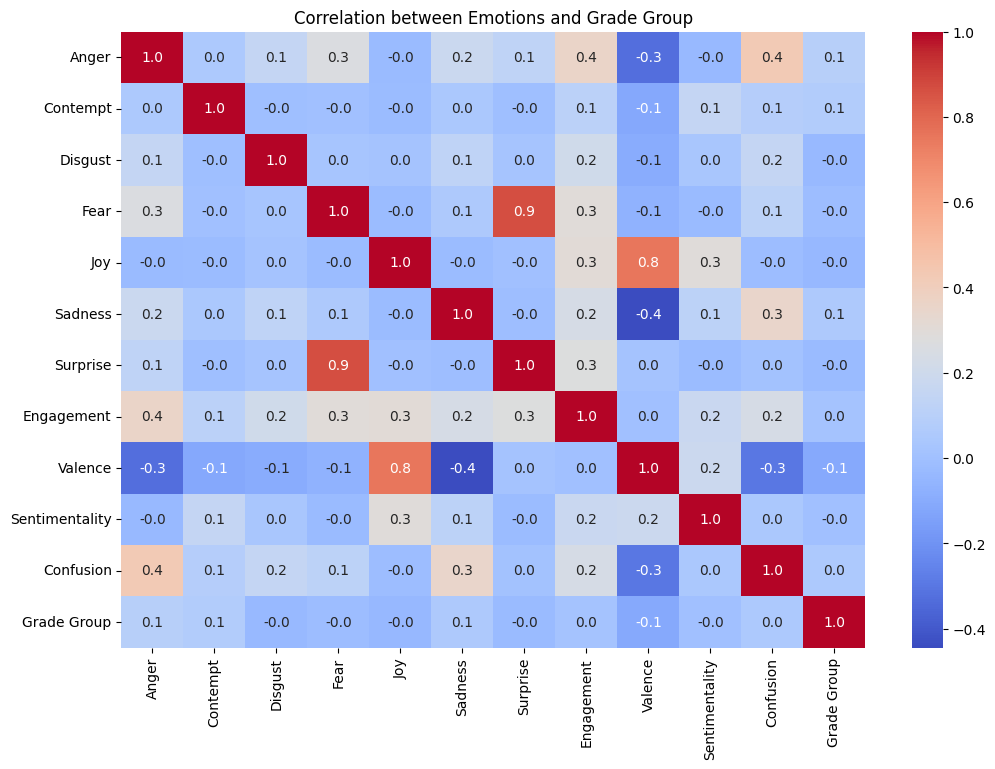

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Engagement', 'Valence', 'Sentimentality', 'Confusion', 'Grade Group']
# Create a copy of the facial_expressions_data DataFrame
data_to_plot = facial_expressions_data.copy()

# Create a subset of the data with only the selected columns
subset_data = data_to_plot[columns_to_plot]

# Convert the 'Grade Group' column to a categorical variable and encode it as numeric
subset_data.loc[:, 'Grade Group'] = pd.Categorical(data_to_plot['Grade Group']).codes

# Plot a heatmap of the correlations between each emotion and the grade group
plt.figure(figsize=(12, 8))
sns.heatmap(subset_data.corr(), cmap='coolwarm', annot=True, fmt='.1f')
plt.title('Correlation between Emotions and Grade Group')
plt.show()


<h2>Random Limited Observations for Each Respondent</h2>

In [10]:
import pandas as pd
from scipy.stats import ttest_ind

from tabulate import tabulate

# Add a new column to the combined_data_with_grades dataframe that indicates whether the grade is above or below 55
facial_expressions_data['Grade Group'] = facial_expressions_data['Grade'].apply(lambda x: 'Above 55' if x > 55 else 'Below 55')

# Describe statistics for each selected column by grade group
selected_columns = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Engagement', 'Valence', 'Sentimentality', 'Confusion', 'Grade Group', 'Respondent']

# Only for selected columns
emotions_data = facial_expressions_data[selected_columns]

# Group the data by the respondent ID and randomly select 1000 observations from each group
sampled_data = emotions_data.groupby('Respondent').apply(lambda x: x.sample(n=5000))

columns_for_calculation = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Engagement', 'Valence', 'Sentimentality', 'Confusion']

# Perform the t-test for each column between the two groups
for col in columns_for_calculation:
    above_55 = sampled_data.loc[sampled_data['Grade Group'] == 'Above 55', col]
    below_55 = sampled_data.loc[sampled_data['Grade Group'] == 'Below 55', col]
    t, pval = ttest_ind(above_55, below_55, equal_var=True)
    print(f'{col}: p-value = {pval:.4f}')


Anger: p-value = 0.0000
Contempt: p-value = 0.0000
Disgust: p-value = 0.0000
Fear: p-value = 0.0015
Joy: p-value = 0.0000
Sadness: p-value = 0.0000
Surprise: p-value = 0.0000
Engagement: p-value = 0.0000
Valence: p-value = 0.0000
Sentimentality: p-value = 0.0006
Confusion: p-value = 0.0000


In [11]:
import pandas as pd
from scipy.stats import ttest_ind

# Select the columns to include in the analysis
selected_columns = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Engagement', 'Valence', 'Sentimentality', 'Confusion']

# Perform the t-test for each selected column between the two groups
results = []
for col in selected_columns:
    above_55 = facial_expressions_data.loc[facial_expressions_data['Grade Group'] == 'Above 55', col]
    below_55 = facial_expressions_data.loc[facial_expressions_data['Grade Group'] == 'Below 55', col]
    t, pval = ttest_ind(above_55, below_55, equal_var=False)

    # Create a descriptive statistics table for the current column
    stats = pd.concat([above_55.describe(), below_55.describe()], axis=1, keys=['Above 55', 'Below 55'])
    
    # Add the t-test result and p-value to the table
    stats.loc['T-test', ''] = t
    stats.loc['P-value', ''] = pval
    
    # Add the table to the results list
    results.append((col, stats))
    
# Display the results
for col, stats in results:
    print(col)
    display(stats)


Anger


,Above 55,Below 55,
count,397414.000000,485412.000000,NaN
mean,1.079292,2.280741,NaN
std,3.691130,8.040508,NaN
min,0.000000,0.000000,NaN
25%,0.135456,0.141532,NaN
50%,0.255017,0.297475,NaN
75%,1.062187,1.242200,NaN
max,97.433800,95.615936,NaN
T-test,NaN,NaN,-92.840875
P-value,NaN,NaN,0.000000


Contempt


,Above 55,Below 55,
count,397414.000000,485412.000000,NaN
mean,1.069407,2.625446,NaN
std,7.127347,12.995892,NaN
min,0.000000,0.000000,NaN
25%,0.181861,0.189959,NaN
50%,0.192783,0.195313,NaN
75%,0.204566,0.251976,NaN
max,98.275467,99.885056,NaN
T-test,NaN,NaN,-71.338767
P-value,NaN,NaN,0.000000


Disgust


,Above 55,Below 55,
count,397414.000000,485412.000000,NaN
mean,0.747064,0.446287,NaN
std,4.919454,3.352219,NaN
min,0.000000,0.000000,NaN
25%,0.024715,0.025104,NaN
50%,0.044028,0.040587,NaN
75%,0.468389,0.440062,NaN
max,99.332336,98.880486,NaN
T-test,NaN,NaN,3.280840e+01
P-value,NaN,NaN,6.857372e-236


Fear


,Above 55,Below 55,
count,397414.000000,485412.000000,NaN
mean,1.563365,1.332385,NaN
std,7.540560,4.863648,NaN
min,0.000000,0.000000,NaN
25%,0.133490,0.138907,NaN
50%,0.213633,0.236742,NaN
75%,0.837069,0.938859,NaN
max,99.734726,99.461021,NaN
T-test,NaN,NaN,1.667796e+01
P-value,NaN,NaN,1.953397e-62


Joy


,Above 55,Below 55,
count,397414.000000,485412.000000,NaN
mean,2.335019,1.292320,NaN
std,14.232215,10.325829,NaN
min,0.000000,0.000000,NaN
25%,0.024229,0.024110,NaN
50%,0.024744,0.024438,NaN
75%,0.027693,0.025844,NaN
max,99.979660,99.979660,NaN
T-test,NaN,NaN,38.609501
P-value,NaN,NaN,0.000000


Sadness


,Above 55,Below 55,
count,397414.000000,485412.000000,NaN
mean,0.674108,1.244081,NaN
std,4.480074,5.595624,NaN
min,0.000000,0.000000,NaN
25%,0.122700,0.126964,NaN
50%,0.127403,0.130241,NaN
75%,0.132587,0.162326,NaN
max,98.614502,99.033897,NaN
T-test,NaN,NaN,-53.148442
P-value,NaN,NaN,0.000000


Surprise


,Above 55,Below 55,
count,397414.000000,485412.000000,NaN
mean,1.778295,1.330557,NaN
std,9.555387,6.501227,NaN
min,0.000000,0.000000,NaN
25%,0.056446,0.058867,NaN
50%,0.062690,0.075105,NaN
75%,0.156715,0.319496,NaN
max,99.988937,99.973244,NaN
T-test,NaN,NaN,2.515458e+01
P-value,NaN,NaN,1.460706e-139


Engagement


,Above 55,Below 55,
count,397414.000000,485412.000000,NaN
mean,25.839505,26.683097,NaN
std,32.950151,33.887276,NaN
min,0.000000,0.000000,NaN
25%,0.328766,0.328766,NaN
50%,1.980824,1.572492,NaN
75%,59.181856,61.570188,NaN
max,99.981064,99.981064,NaN
T-test,NaN,NaN,-1.181537e+01
P-value,NaN,NaN,3.270122e-32


Valence


,Above 55,Below 55,
count,397414.000000,485412.000000,NaN
mean,1.367293,-2.188662,NaN
std,16.726070,15.632448,NaN
min,-98.869362,-99.746422,NaN
25%,0.000000,0.000000,NaN
50%,0.000000,0.000000,NaN
75%,0.000000,0.000000,NaN
max,99.967102,99.871223,NaN
T-test,NaN,NaN,102.336954
P-value,NaN,NaN,0.000000


Sentimentality


,Above 55,Below 55,
count,397414.000000,485412.000000,NaN
mean,1.176164,1.170175,NaN
std,5.306584,5.513375,NaN
min,0.000000,0.000000,NaN
25%,0.014125,0.013390,NaN
50%,0.073459,0.076567,NaN
75%,0.395491,0.362695,NaN
max,99.858139,96.003937,NaN
T-test,NaN,NaN,0.518397
P-value,NaN,NaN,0.604182


Confusion


,Above 55,Below 55,
count,397414.000000,485412.000000,NaN
mean,1.218046,1.871243,NaN
std,5.747356,7.536171,NaN
min,0.000000,0.000000,NaN
25%,0.038018,0.030327,NaN
50%,0.123128,0.173346,NaN
75%,0.421504,0.736244,NaN
max,99.231071,98.833687,NaN
T-test,NaN,NaN,-46.174299
P-value,NaN,NaN,0.000000


In [12]:
import pandas as pd
from scipy.stats import ttest_ind

# Group the data by the respondent ID and randomly select 1000 observations from each group
sampled_data = facial_expressions_data.groupby('Respondent').apply(lambda x: x.sample(n=1000))

columns_for_calculation = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Engagement', 'Valence', 'Sentimentality', 'Confusion']

# Perform the t-test for each column between the two groups
for col in columns_for_calculation:
    above_55 = sampled_data.loc[sampled_data['Grade Group'] == 'Above 55', col]
    below_55 = sampled_data.loc[sampled_data['Grade Group'] == 'Below 55', col]
    t, pval = ttest_ind(above_55, below_55, equal_var=False)
    print(f'{col}: p-value = {pval:.4f}')

    # Describe the statistics for each group
    above_55_stats = above_55.describe()
    below_55_stats = below_55.describe()

    # Print the statistics for each group
    print('Above 55:')
    print(above_55_stats)
    print('Below 55:')
    print(below_55_stats)


Anger: p-value = 0.0000
Above 55:
count    8000.000000
mean        0.989183
std         3.136269
min         0.000000
25%         0.138372
50%         0.265835
75%         1.082268
max        89.401100
Name: Anger, dtype: float64
Below 55:
count    8000.000000
mean        2.093398
std         7.726492
min         0.000000
25%         0.140987
50%         0.314854
75%         1.230519
max        94.168320
Name: Anger, dtype: float64
Contempt: p-value = 0.0000
Above 55:
count    8000.000000
mean        1.158935
std         7.650980
min         0.000000
25%         0.185565
50%         0.193452
75%         0.209884
max        98.275467
Name: Contempt, dtype: float64
Below 55:
count    8000.000000
mean        2.214870
std        11.776368
min         0.000000
25%         0.189754
50%         0.194575
75%         0.231303
max        99.814308
Name: Contempt, dtype: float64
Disgust: p-value = 0.0001
Above 55:
count    8000.000000
mean        0.723439
std         4.648844
min         0.000000

<h3>P-Value on Random Data From Each Respondent</h3>

[Text(0, 0, 'Anger'),
 Text(1, 0, 'Contempt'),
 Text(2, 0, 'Disgust'),
 Text(3, 0, 'Fear'),
 Text(4, 0, 'Joy'),
 Text(5, 0, 'Sadness'),
 Text(6, 0, 'Surprise'),
 Text(7, 0, 'Engagement'),
 Text(8, 0, 'Valence'),
 Text(9, 0, 'Sentimentality'),
 Text(10, 0, 'Confusion')]

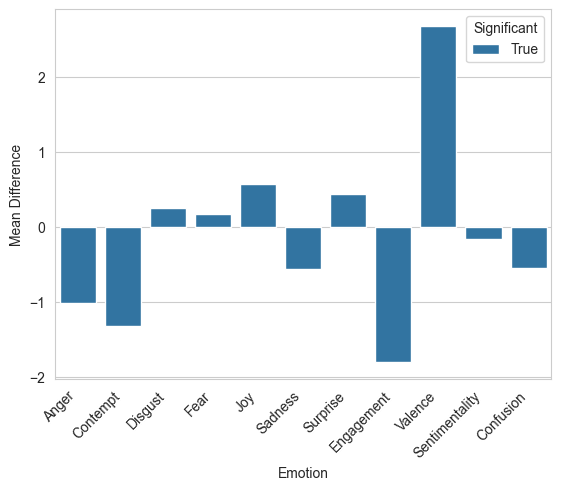

In [18]:
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind

# Group the data by the respondent ID and randomly select 8000 observations from each group
sampled_data = facial_expressions_data.groupby('Respondent').apply(lambda x: x.sample(n=8000))

# Perform the t-test for each column between the two groups
results = []
for col in columns_for_calculation:
        above_55 = sampled_data.loc[sampled_data['Grade Group'] == 'Above 55', col]
        below_55 = sampled_data.loc[sampled_data['Grade Group'] == 'Below 55', col]
        t, pval = ttest_ind(above_55, below_55, equal_var=True)
        if pval <= 0.003:
            sig = True
        else:
            sig = False
        mean_diff = above_55.mean() - below_55.mean()
        results.append({'Emotion': col, 'Mean Difference': mean_diff, 'Significant': sig})

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Visualize the results using a bar plot
sns.set_style("whitegrid")
ax = sns.barplot(x="Emotion", y="Mean Difference", hue="Significant", data=results_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


<h4>Mann-Whitney U test </h4>

[Text(0, 0, 'Anger'),
 Text(1, 0, 'Contempt'),
 Text(2, 0, 'Disgust'),
 Text(3, 0, 'Fear'),
 Text(4, 0, 'Joy'),
 Text(5, 0, 'Sadness'),
 Text(6, 0, 'Surprise'),
 Text(7, 0, 'Engagement'),
 Text(8, 0, 'Valence'),
 Text(9, 0, 'Sentimentality'),
 Text(10, 0, 'Confusion')]

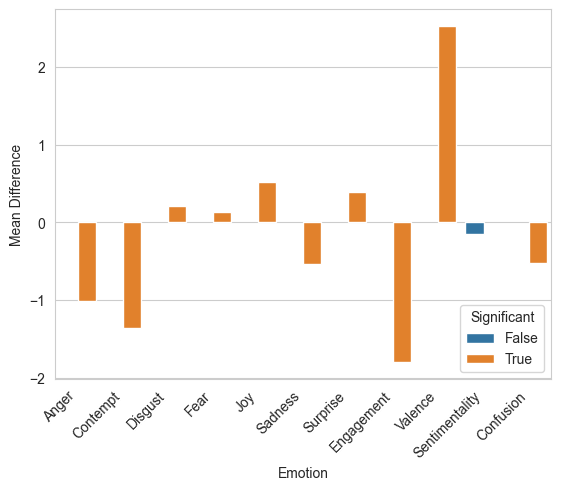

In [21]:
import pandas as pd
import seaborn as sns
from scipy.stats import mannwhitneyu

# Group the data by the respondent ID and randomly select 8000 observations from each group
sampled_data = facial_expressions_data.groupby('Respondent').apply(lambda x: x.sample(n=8000))

# Perform the t-test for each column between the two groups
results = []
for col in columns_for_calculation:
        above_55 = sampled_data.loc[sampled_data['Grade Group'] == 'Above 55', col]
        below_55 = sampled_data.loc[sampled_data['Grade Group'] == 'Below 55', col]
        statistic, pval = mannwhitneyu(above_55, below_55, alternative='two-sided')
        if pval <= 0.05:
            sig = True
        else:
            sig = False
        mean_diff = above_55.mean() - below_55.mean()
        results.append({'Emotion': col, 'Mean Difference': mean_diff, 'Significant': sig})

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Visualize the results using a bar plot
sns.set_style("whitegrid")
ax = sns.barplot(x="Emotion", y="Mean Difference", hue="Significant", data=results_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


<h3>Save Dataset to File</h3>

In [19]:
import datetime

# Get current date and time as string
now = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Define filename with timestamp
filename = f"sampled_data_{now}.csv"

# Save sampled_data to file
sampled_data.to_csv(filename, index=False)


<h2>Random Forest for Grade Group on the Random Sample Size</h2>

<h4>Train model on 15 respondents and validate on 1</h4>

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Select only some features
datatset = facial_expressions_data[selected_columns + ['Grade Group'] + ['Respondent']]

# Identify the unique respondent IDs
respondent_ids = datatset['Respondent'].unique()

# Select 15 respondents for training and 1 for validation
train_respondents, validation_respondent = train_test_split(respondent_ids, test_size=1, random_state=42)

# Create training and validation sets based on the selected respondents
train_set = datatset[datatset['Respondent'].isin(train_respondents)]
validation_set = datatset[datatset['Respondent'] == validation_respondent[0]]

# Assuming 'target_column' is the column you want to predict
X_train = train_set.drop('Grade Group', axis=1)
y_train = train_set['Grade Group']

X_validation = validation_set.drop('Grade Group', axis=1)
y_validation = validation_set['Grade Group']

# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation set
predictions = rf_classifier.predict(X_validation)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_validation, predictions)
print(f"Accuracy on the validation set: {accuracy}")


Accuracy on the validation set: 0.0


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
from sklearn.metrics import classification_report
import pickle

# Select only some features
datatset = sampled_data[selected_columns + ['Grade Group']]

# Split the data into training and testing sets
X = datatset.drop('Grade Group', axis=1)
y = datatset['Grade Group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict the test set
y_pred = clf.predict(X_test)

# Save the trained classifier to a file
with open(f'random_forest_classifier_{now}.pkl', 'wb') as f:
    pickle.dump(clf, f)

# Print the accuracy score
print("Accuracy score:", accuracy_score(y_test, y_pred))

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

# Evaluate the model
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate TPR, FPR, TNR, FNR
tnr = tn / (tn + fp)
tpr = tp / (tp + fn)
fnr = fn / (fn + tp)
fpr = fp / (fp + tn)

# Calculate precision
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)


KeyboardInterrupt: 

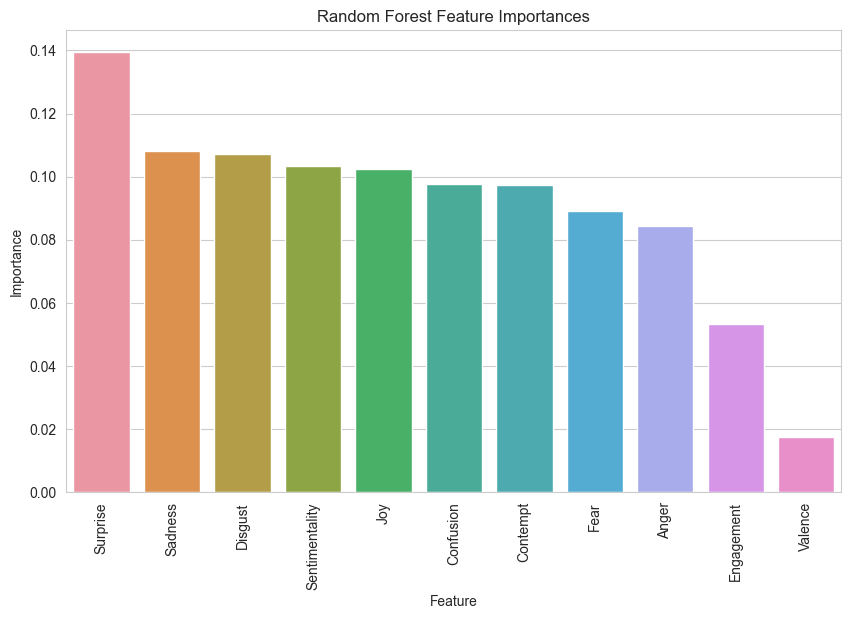

In [ ]:
# Get the feature importances
importances = clf.feature_importances_
features = X.columns

# Sort the importances in descending order
sorted_importances = sorted(zip(importances, features), reverse=True)

# Extract the sorted feature importances and feature names
sorted_feature_importances = [x[0] for x in sorted_importances]
sorted_feature_names = [x[1] for x in sorted_importances]

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_names, y=sorted_feature_importances)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()

<h2>Test the Model on the Full Data</h2>

In [ ]:
import pandas as pd
import pickle
from datetime import datetime
from sklearn.metrics import confusion_matrix, precision_score

# Load the saved model from the pickle file
with open(f'random_forest_classifier_{now}.pkl', 'rb') as f:
    model = pickle.load(f)

# Extract the features from the full data
features = facial_expressions_data[selected_columns]

# Make predictions on the features using the loaded model
predictions = model.predict(features)

# Compare the predicted grade group labels with the pre-labeled grade group labels
correct_predictions = sum(predictions == facial_expressions_data['Grade Group']) 
accuracy = correct_predictions / len(facial_expressions_data)
print(f"Accuracy on new data: {accuracy}")

# Print the accuracy score
print("Accuracy score:", accuracy_score(facial_expressions_data['Grade Group'], predictions))

# Print the classification report
print(classification_report(facial_expressions_data['Grade Group'], predictions))

# Print the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(facial_expressions_data['Grade Group'], predictions))

# Evaluate the model
tn, fp, fn, tp = confusion_matrix(facial_expressions_data['Grade Group'], predictions).ravel()

# Calculate TPR, FPR, TNR, FNR
tnr = tn / (tn + fp)
tpr = tp / (tp + fn)
fnr = fn / (fn + tp)
fpr = fp / (fp + tn)

# Calculate precision
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)


Accuracy on new data: 0.8292007711598888
Accuracy score: 0.8292007711598888
              precision    recall  f1-score   support

    Above 55       0.80      0.83      0.81    397414
    Below 55       0.86      0.83      0.84    485412

    accuracy                           0.83    882826
   macro avg       0.83      0.83      0.83    882826
weighted avg       0.83      0.83      0.83    882826

Confusion matrix:
[[330646  66768]
 [ 84018 401394]]
Precision: [0.82038217 0.82177914]


In [ ]:
print('FPR: ', fpr)
print('TPR: ', tpr)
print('FNR: ', fnr)
print('TNR: ', tnr)

FPR:  0.16800615982325737
TPR:  0.8269140441521842
FNR:  0.1730859558478159
TNR:  0.8319938401767426


<h3>Cross Validation Check</h3>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import pickle

# Select only some features
datatset = sampled_data[selected_columns + ['Grade Group']]

# Split the data into training and testing sets
X = datatset.drop('Grade Group', axis=1)
y = datatset['Grade Group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform k-fold cross-validation on the training set
scores = cross_val_score(clf, X_train, y_train, cv=5)

# Print the cross-validation scores
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")

# Fit the classifier to the training set
clf.fit(X_train, y_train)

# Predict the test set
y_pred = clf.predict(X_test)

# Save the trained classifier to a file
with open(f'random_forest_classifier_{now}.pkl', 'wb') as f:
    pickle.dump(clf, f)

# Print the accuracy score
print("Accuracy score:", accuracy_score(y_test, y_pred))

# Print the classification report
print(classification_report(y_test, y_pred))


Cross-validation scores: [0.796875   0.79980469 0.80898437 0.81523437 0.80761719]
Mean cross-validation score: 0.805703125
Accuracy score: 0.82109375
              precision    recall  f1-score   support

    Above 55       0.82      0.82      0.82      3157
    Below 55       0.82      0.83      0.82      3243

    accuracy                           0.82      6400
   macro avg       0.82      0.82      0.82      6400
weighted avg       0.82      0.82      0.82      6400



<h3>Shap Features Analysis</h3>

In [ ]:
# import shap

# # Calculate SHAP values
# explainer = shap.TreeExplainer(clf)
# shap_values = explainer.shap_values(X)

# # Plot summary plot
# shap.summary_plot(shap_values, X, plot_type="bar")
